In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from IPython.display import Image

In [2]:
mortality_ca = pd.read_csv("Resources/mortality_2006_2010_clean.csv")
pollution_ca = pd.read_csv("Resources/pollution_2006_2010.csv")

In [3]:
diseases = mortality_ca["ICD-10 113 Cause List"].unique().tolist()
print(diseases, len(diseases))

['Influenza and pneumonia (J09-J18)', 'Pneumonia (J12-J18)', 'Chronic lower respiratory diseases (J40-J47)', 'Bronchitis, chronic and unspecified (J40-J42)', 'Emphysema (J43)', 'Asthma (J45-J46)', 'Other chronic lower respiratory diseases (J44,J47)', 'Pneumonitis due to solids and liquids (J69)', 'Other diseases of respiratory system (J00-J06,J30- J39,J67,J70-J98)', 'Influenza (J09-J11)'] 10


In [4]:
counties_list = pollution_ca["County"].unique().tolist()
print(counties_list, len(counties_list))

['Contra Costa', 'Humboldt', 'Imperial', 'Los Angeles', 'Orange', 'Riverside', 'Sacramento', 'San Bernardino', 'San Diego', 'San Francisco', 'Santa Barbara', 'Santa Cruz', 'Solano', 'Alameda', 'Fresno', 'Santa Clara'] 16


In [5]:
clrd_mortality = mortality_ca[mortality_ca["ICD-10 113 Cause List"] == 
                                         "Chronic lower respiratory diseases (J40-J47)"]
# clrd_mortality.head()

In [7]:
grouped_clrd = clrd_mortality.groupby(["County", "Year"])["Deaths"].agg([np.sum])
grouped_clrd1 = grouped_clrd.rename(columns={"sum": "Death"})
grouped_clrd1

Death
County  Year       
Alameda 2006  422.0
        2007  405.0
        2008  455.0
        2009  419.0
        2010  399.0
...             ...
Solano  2006  143.0
        2007  127.0
        2008  125.0
        2009  137.0
        2010  163.0

[80 rows x 1 columns]

In [8]:
pollutants_la = pollution_ca[pollution_ca["County"] == "Los Angeles"]
# pollutants_la

In [9]:
no2_pollutants_la = pollutants_la.groupby(["County", "Year"])["NO2 AQI"].agg([np.sum])
no2_pollutants_la1 = no2_pollutants_la.rename(columns={"sum": "NO2 AQI"})
no2_pollutants_la1

NO2 AQI
County      Year         
Los Angeles 2006   214108
            2007   208904
            2008   210752
            2009   182200
            2010   227940

In [10]:
clrd_deaths_la = grouped_clrd1.filter(like="Los Angeles", axis=0)
# clrd_deaths_la

In [11]:
la_merged = pd.merge(no2_pollutants_la1, clrd_deaths_la, on="Year")
la_merged1 = la_merged.reset_index()
la_merged2 = la_merged1.rename(columns={"Death": "Los Angeles"})
la_merged2

,Year,NO2 AQI,Los Angeles
0,2006,214108,2835.0
1,2007,208904,2776.0
2,2008,210752,3030.0
3,2009,182200,3066.0
4,2010,227940,2761.0


In [18]:
def line_plots(s):
    x = s["Year"]
    y1 = s[s.columns[1]] 
    y2 = s[s.columns[2]]
    fig, ax = plt.subplots()
    ax.plot(x, y1, color="blue", marker="o")

    ax2 = ax.twinx()
    ax2.plot(x, y2, color="red", marker="o")

    ax.xaxis.set_ticks(x)
    ax.set_xlabel("Year")
    ax.set_ylabel(f"Total {s.columns[1]}")
    ax2.set_ylabel("Number of Deaths")

    red_patch = mpatches.Patch(color="blue", label=s.columns[1])
    blue_patch = mpatches.Patch(color="red", label="Deaths")
    plt.legend(handles=[red_patch, blue_patch])

    plt.title(f"""
    Number of Chronic Lower Respiratory Diseases Deaths in {s.columns[2]} 
    vs Total {s.columns[1]} (Air Qualitity Index) | 2006-2010
    """)
    plt.show()
    plt.tight_layout()

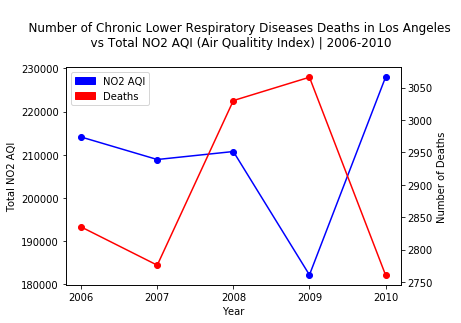

<Figure size 432x288 with 0 Axes>

In [19]:
line_plots(la_merged2)

In [ ]:
# 'Contra Costa', 'Humboldt', 'Imperial', 'Los Angeles', 'Orange', 'Riverside', 
# 'Sacramento', 'San Bernardino', 'San Diego', 'San Francisco', 'Santa Barbara', 'Santa Cruz', 
# 'Solano', 'Alameda', 'Fresno', 'Santa Clara'

In [20]:
o3_pollutants_la = pollutants_la.groupby(["County", "Year"])["O3 AQI"].agg([np.sum])
o3_pollutants_la1 = o3_pollutants_la.rename(columns={"sum": "O3 AQI"})
o3_pollutants_la1

O3 AQI
County      Year        
Los Angeles 2006  187092
            2007  184796
            2008  198816
            2009  171244
            2010  213340

In [21]:
la_merged_o3 = pd.merge(o3_pollutants_la1, clrd_deaths_la, on="Year")
la_merged_o3_1 = la_merged_o3.reset_index()
la_merged_o3_2 = la_merged_o3_1.rename(columns={"Death": "Los Angeles"})
la_merged_o3_2

,Year,O3 AQI,Los Angeles
0,2006,187092,2835.0
1,2007,184796,2776.0
2,2008,198816,3030.0
3,2009,171244,3066.0
4,2010,213340,2761.0


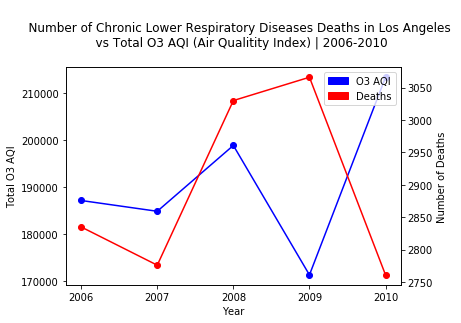

<Figure size 432x288 with 0 Axes>

In [22]:
line_plots(la_merged_o3_2)

In [23]:
so2_pollutants_la = pollutants_la.groupby(["County", "Year"])["SO2 AQI"].agg([np.sum])
so2_pollutants_la1 = so2_pollutants_la.rename(columns={"sum": "SO2 AQI"})
so2_pollutants_la1

SO2 AQI
County      Year         
Los Angeles 2006  16172.0
            2007  14818.0
            2008  12968.0
            2009   9090.0
            2010  10022.0

In [24]:
la_merged_so2 = pd.merge(so2_pollutants_la1, clrd_deaths_la, on="Year")
la_merged_so2_1 = la_merged_so2.reset_index()
la_merged_so2_2 = la_merged_so2_1.rename(columns={"Death": "Los Angeles"})
la_merged_so2_2

,Year,SO2 AQI,Los Angeles
0,2006,16172.0,2835.0
1,2007,14818.0,2776.0
2,2008,12968.0,3030.0
3,2009,9090.0,3066.0
4,2010,10022.0,2761.0


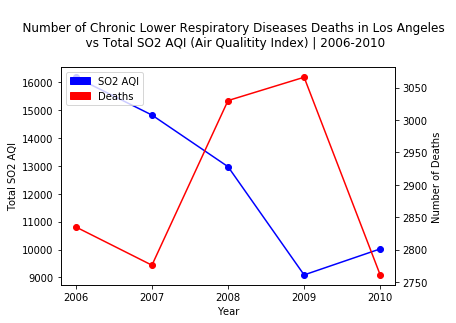

<Figure size 432x288 with 0 Axes>

In [25]:
line_plots(la_merged_so2_2)

In [26]:
co_pollutants_la = pollutants_la.groupby(["County", "Year"])["CO AQI"].agg([np.sum])
co_pollutants_la1 = co_pollutants_la.rename(columns={"sum": "CO AQI"})
co_pollutants_la1

CO AQI
County      Year         
Los Angeles 2006  27650.0
            2007  24144.0
            2008  22606.0
            2009  22120.0
            2010  24056.0

In [27]:
la_merged_co = pd.merge(co_pollutants_la1, clrd_deaths_la, on="Year")
la_merged_co_1 = la_merged_co.reset_index()
la_merged_co_2 = la_merged_co_1.rename(columns={"Death": "Los Angeles"})
la_merged_co_2

,Year,CO AQI,Los Angeles
0,2006,27650.0,2835.0
1,2007,24144.0,2776.0
2,2008,22606.0,3030.0
3,2009,22120.0,3066.0
4,2010,24056.0,2761.0


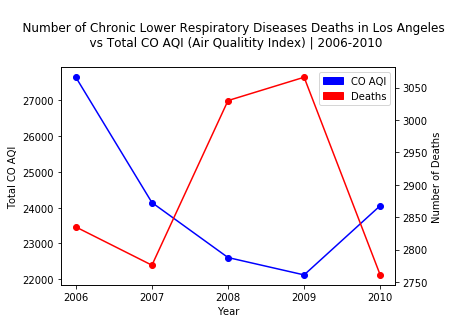

<Figure size 432x288 with 0 Axes>

In [28]:
line_plots(la_merged_co_2)